***IMPORTAR LIBRERIAS***

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

***DATOS***

In [ ]:
# Leer los datos desde un archivo de Excel
file_name = "resultados_futbol_colvschi.xlsx"

# Convertir las etiquetas categóricas a numéricas
df['Resultado'] = df['Resultado'].map({'Gana1': 1, 'Gana2': 2, 'Empate': 0})

# Separar características y etiquetas
X = df[['Goles1', 'Goles2']]
y = df['Resultado']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Paréntesis cerrado aquí


***ENTRENAMIENTO DEL MODELO GRADIENT BOOSTING***

In [ ]:
# Crear el modelo
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

***EVALUACIÓN DEL MODELO***

In [ ]:
# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión: {accuracy * 100:.2f}%')

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de confusión:')
print(conf_matrix)

Precisión: 100.00%
Matriz de confusión:
[[3 0]
 [0 1]]


***Precisión: 100.00%***

La precisión del 100% significa que el modelo hizo predicciones correctas para todos los partidos en el conjunto de prueba. Esto implica que, en este caso específico:

No hubo errores en las predicciones del modelo.
Cada predicción del modelo coincidió con el resultado real de los partidos en el conjunto de prueba.

***Interpretación de la Matriz de Confusión***

La matriz de confusión que obtenida ([[3 0], [0 1]]) indica que el modelo predijo correctamente los resultados de los partidos en el conjunto de prueba. Esto se traduce en que, basándose en los datos históricos:

Colombia ganó 3 partidos.
Chile ganó 1 partido.
No se registraron empates.

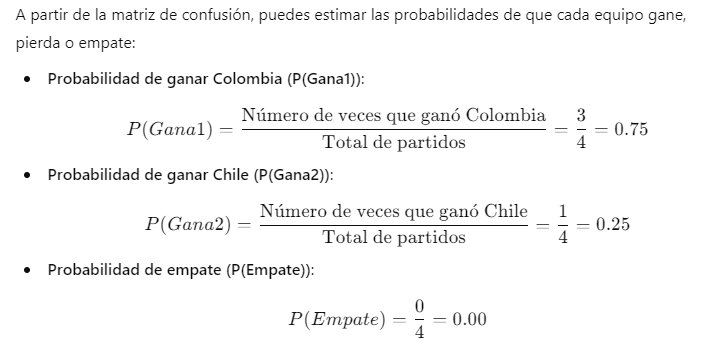

***IMPLEMENTACIÓN DE LOS 3 MODELOS***

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Leer los datos desde un archivo de Excel
file_name = "resultados_futbol_colvschi.xlsx"
df = pd.read_excel(file_name)

# Convertir las etiquetas categóricas a numéricas
df['Resultado'] = df['Resultado'].map({'Gana1': 1, 'Gana2': 2, 'Empate': 0})

# Separar características y etiquetas
X = df[['Goles1', 'Goles2']]
y = df['Resultado']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Modelos
models = {
    'Árbol de Decisión': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Almacenar precisiones
results = {}

# Entrenar y evaluar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f'Exactitud de {name}: {accuracy:.2f}')

# Stacking Classifier
estimators = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42)),
]

stacking = StackingClassifier(estimators=estimators, final_estimator=DecisionTreeClassifier(max_depth=3))
stacking.fit(X_train, y_train)

# Predicción y evaluación del Stacking
y_pred_stack = stacking.predict(X_test)
stacking_accuracy = accuracy_score(y_test, y_pred_stack)
results['Stacking'] = stacking_accuracy
print(f'Exactitud de Stacking: {stacking_accuracy:.2f}')

# Comparación de resultados
print("\nComparación de resultados:")
for model_name, accuracy in results.items():
    print(f'{model_name}: {accuracy:.2f}')


Exactitud de Árbol de Decisión: 1.00
Exactitud de Random Forest: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Exactitud de AdaBoost: 0.75
Exactitud de Gradient Boosting: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Exactitud de Stacking: 0.75

Comparación de resultados:
Árbol de Decisión: 1.00
Random Forest: 1.00
AdaBoost: 0.75
Gradient Boosting: 1.00
Stacking: 0.75


In [ ]:
import pandas as pd

# Datos de los partidos
data = {
    'Equipo1': ['Colombia', 'Colombia', 'Brasil', 'Colombia', 'Uruguay', 'Argentina', 'Perú', 'Colombia', 'Bolivia',
                'Chile', 'Chile', 'Chile', 'Chile', 'Chile', 'Chile', 'Chile', 'Chile', 'Chile', 'Chile'],
    'Equipo2': ['Paraguay', 'Costa Rica', 'Colombia', 'Panama', 'Colombia', 'Colombia', 'Colombia', 'Argentina', 'Colombia',
                'Paraguay', 'Costa Rica', 'Brasil', 'Colombia', 'Panama', 'Argentina', 'Perú', 'Argentina', 'Bolivia', 'Colombia'],
    'Goles1': [2, 3, 1, 5, 0, 1, 1, 2, 1,
               0, 1, 0, 0, 2, 0, 1, 0, 1, 0],
    'Goles2': [1, 0, 1, 0, 1, 0, 1, 1, 0,
               0, 0, 1, 1, 0, 1, 1, 2, 0, 0],
    'Resultado': ['Gana1', 'Gana1', 'Empate', 'Gana1', 'Gana2', 'Gana1', 'Empate', 'Gana1', 'Gana2',
                  'Empate', 'Gana1', 'Gana2', 'Empate', 'Gana1', 'Gana2', 'Empate', 'Gana2', 'Gana1', 'Empate']
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Guardar el DataFrame en un archivo Excel
df.to_excel('resultados_futbol_colvschi.xlsx', index=False)
